In [2]:
#pandas有効化
import pandas as pd

#numpy有効化
import numpy as np

#matplotlib有効化
import matplotlib.pyplot as plt
# import matplotlib.pyplot import figure

#seaborn有効化
import seaborn as sns

#matplotlib日本語有効化
import japanize_matplotlib
sns.set(font="IPAexGothic")

#最大表示行数確認
# pd.get_option("display.max_rows")

#最大表示行数変更
pd.set_option("display.max_rows" , 1000)

In [3]:
df1 = pd.read_csv("input/cases_total.csv")
df2 = pd.read_csv("input/death_total.csv")
df3 = pd.read_csv("input/pcr_positive_daily.csv")
df4 = pd.read_csv("input/recovery_total.csv")
df5 = pd.read_csv("input/severe_daily.csv")

In [4]:
# df4["year"] = df4["year"].astype(str)
# df4["month"] = df4["month"].astype(str)
# df4["date"] = df4["date"].astype(str)

In [5]:
# df4["日付"] = df4["year"] + "/" + df4["month"] + "/" + df4["date"]
# df4 = df4.drop(["prefectureNameE" , "year" , "month" , "date"] , axis = 1)
# df4.head()

In [6]:
df = pd.merge(df1 , df2 , on = "日付" , how = "left")
df = pd.merge(df , df3 , on = "日付" , how = "left")
df = pd.merge(df , df4 , on = "日付" , how = "left")
df = pd.merge(df , df5 , on = "日付" , how = "left")
df.head(15)

,日付,入院治療を要する者,死亡者数,PCR 検査陽性者数(単日),退院、療養解除となった者,重症者数
0,2020/2/4,15,NaN,2,1,NaN
1,2020/2/5,16,NaN,2,4,0.0
2,2020/2/6,12,NaN,0,4,0.0
3,2020/2/7,12,NaN,0,6,0.0
4,2020/2/8,7,NaN,0,9,0.0
5,2020/2/9,7,NaN,0,9,0.0
6,2020/2/10,7,NaN,0,9,0.0
7,2020/2/11,6,NaN,0,10,0.0
8,2020/2/12,6,NaN,1,11,0.0
9,2020/2/13,6,NaN,4,11,0.0


In [7]:
df.isnull().sum()

日付                 0
入院治療を要する者          0
死亡者数              10
PCR 検査陽性者数(単日)     0
退院、療養解除となった者       0
重症者数               1
dtype: int64

In [8]:
df = df.dropna()
df.isnull().sum()

日付                0
入院治療を要する者         0
死亡者数              0
PCR 検査陽性者数(単日)    0
退院、療養解除となった者      0
重症者数              0
dtype: int64

In [9]:
df = df.rename(columns = {'入院治療を要する者':'現在入院治療者数' , "死亡者数":"死者数" , "PCR 検査陽性者数(単日)":"当日PCR検査陽性者数" , "退院、療養解除となった者" : "療養解除者数"})
df.head(2)

,日付,現在入院治療者数,死者数,当日PCR検査陽性者数,療養解除者数,重症者数
10,2020/2/14,9,1.0,7,12,2.0
11,2020/2/15,24,1.0,12,12,3.0


In [10]:
df = df.reset_index()
df.head(3)

,index,日付,現在入院治療者数,死者数,当日PCR検査陽性者数,療養解除者数,重症者数
0,10,2020/2/14,9,1.0,7,12,2.0
1,11,2020/2/15,24,1.0,12,12,3.0
2,12,2020/2/16,24,1.0,6,13,3.0


In [11]:
df = df.drop("index" ,axis = 1)
df.head(3)

,日付,現在入院治療者数,死者数,当日PCR検査陽性者数,療養解除者数,重症者数
0,2020/2/14,9,1.0,7,12,2.0
1,2020/2/15,24,1.0,12,12,3.0
2,2020/2/16,24,1.0,6,13,3.0


In [12]:
df["入院治療者数変化量"] = df["現在入院治療者数"].diff(periods=1)
df["当日死者数"] = df["死者数"].diff(periods=1)
df["重症者数変化量"] = df["重症者数"].diff(periods=1)
df["当日療養解除者数"] = df["療養解除者数"].diff(periods=1)
df["PCR検査陽性者数"] = df["当日PCR検査陽性者数"].cumsum()
df["入院治療者数"] = df["入院治療者数変化量"].cumsum()
df.head(3)

,日付,現在入院治療者数,死者数,当日PCR検査陽性者数,療養解除者数,重症者数,入院治療者数変化量,当日死者数,重症者数変化量,当日療養解除者数,PCR検査陽性者数,入院治療者数
0,2020/2/14,9,1.0,7,12,2.0,NaN,NaN,NaN,NaN,7,NaN
1,2020/2/15,24,1.0,12,12,3.0,15.0,0.0,1.0,0.0,19,15.0
2,2020/2/16,24,1.0,6,13,3.0,0.0,0.0,0.0,1.0,25,15.0


In [13]:
df["入院治療者数変化量"] = df["入院治療者数変化量"].fillna(7)
df["当日死者数"] = df["当日死者数"].fillna(1)
df["当日療養解除者数"] = df["当日療養解除者数"].fillna(12)
df["重症者数変化量"] = df["重症者数変化量"].fillna(2)
df["入院治療者数"] = df["入院治療者数"].fillna(9)
df.head(3)

,日付,現在入院治療者数,死者数,当日PCR検査陽性者数,療養解除者数,重症者数,入院治療者数変化量,当日死者数,重症者数変化量,当日療養解除者数,PCR検査陽性者数,入院治療者数
0,2020/2/14,9,1.0,7,12,2.0,7.0,1.0,2.0,12.0,7,9.0
1,2020/2/15,24,1.0,12,12,3.0,15.0,0.0,1.0,0.0,19,15.0
2,2020/2/16,24,1.0,6,13,3.0,0.0,0.0,0.0,1.0,25,15.0


In [14]:
df["死者数"] = df["死者数"].astype(int)
df["重症者数"] = df["重症者数"].astype(int)
df["重症者数変化量"] = df["重症者数"].astype(int)
df["入院治療者数変化量"] = df["入院治療者数変化量"].astype(int)
df["当日死者数"] = df["当日死者数"].astype(int)
df["当日療養解除者数"] = df["当日療養解除者数"].astype(int)
df["入院治療者数"] = df["入院治療者数"].astype(int)
df.head(3)

,日付,現在入院治療者数,死者数,当日PCR検査陽性者数,療養解除者数,重症者数,入院治療者数変化量,当日死者数,重症者数変化量,当日療養解除者数,PCR検査陽性者数,入院治療者数
0,2020/2/14,9,1,7,12,2,7,1,2,12,7,9
1,2020/2/15,24,1,12,12,3,15,0,3,0,19,15
2,2020/2/16,24,1,6,13,3,0,0,3,1,25,15


In [15]:
df = df.reindex(columns=["日付" , "入院治療者数" , "重症者数" , "死者数" , "PCR検査陽性者数" , "療養解除者数" , "当日死者数" , "当日PCR検査陽性者数" , "当日療養解除者数" , "入院治療者数変化量" , "重症者数変化量" , "現在入院治療者数"])

In [16]:
#マイナスのところに0を代入
df["入院治療者数増加数"] = np.where(df["入院治療者数変化量"] < 0 , 0 , df["入院治療者数変化量"])

In [17]:
df["入院治療者数"] = df["入院治療者数増加数"].cumsum()
df

,日付,入院治療者数,重症者数,死者数,PCR検査陽性者数,療養解除者数,当日死者数,当日PCR検査陽性者数,当日療養解除者数,入院治療者数変化量,重症者数変化量,現在入院治療者数,入院治療者数増加数
0,2020/2/14,7,2,1,7,12,1,7,12,7,2,9,7
1,2020/2/15,22,3,1,19,12,0,12,0,15,3,24,15
2,2020/2/16,22,3,1,25,13,0,6,1,0,3,24,0
3,2020/2/17,22,3,1,32,12,0,7,-1,0,3,24,0
4,2020/2/18,29,6,1,39,14,0,7,2,7,6,31,7
5,2020/2/19,33,7,1,49,16,0,10,2,4,7,35,4
6,2020/2/20,50,9,1,58,16,0,9,0,17,9,52,17
7,2020/2/21,60,10,1,69,16,0,11,0,10,10,62,10
8,2020/2/22,94,11,1,96,17,0,27,1,34,11,96,34
9,2020/2/23,106,13,1,108,17,0,12,0,12,13,108,12


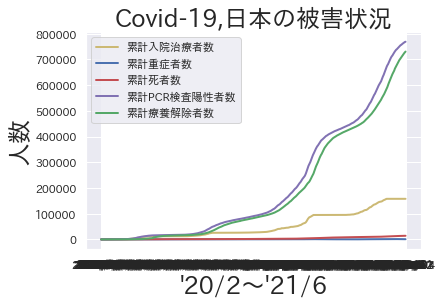

In [18]:
x = df["日付"]
yh = df["入院治療者数"]
yj = df["重症者数"]
yd = df["死者数"]
yp = df["PCR検査陽性者数"]
yk = df["療養解除者数"]

# fig = plt.figure(figsize=(10,10),dpi=200)
# plt = fig.add_subplot(2,1,1)

plt.title("Covid-19,日本の被害状況", fontsize=24)
plt.xlabel("'20/2～'21/6", fontsize=24)
plt.ylabel("人数", fontsize=24)

plt.plot(x , yh , color = "y" , linewidth = 2.0 , label = "累計入院治療者数")
plt.plot(x , yj , color = "b" , linewidth = 2.0 , label = "累計重症者数")
plt.plot(x , yd , color = "r" , linewidth = 2.0 , label = "累計死者数")
plt.plot(x , yp , color = "m" ,  linewidth = 2.0 , label = "累計PCR検査陽性者数")
plt.plot(x , yk , color = "g" ,  linewidth = 2.0 , label = "累計療養解除者数")

plt.legend()
plt.savefig("Covid-19,日本の被害状況.png", format="png", dpi=300 , bbox_inches="tight")
plt.show()

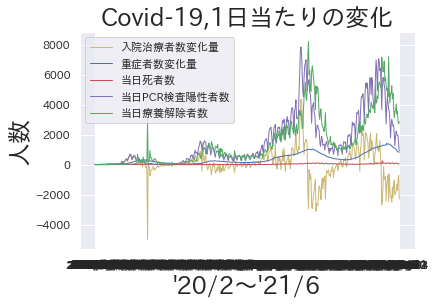

In [19]:
x = df["日付"]
yhd = df["入院治療者数変化量"]
yjd = df["重症者数変化量"]
ydd = df["当日死者数"]
ypd = df["当日PCR検査陽性者数"]
ykd = df["当日療養解除者数"]

plt.title("Covid-19,1日当たりの変化", fontsize=24)
plt.xlabel("'20/2～'21/6", fontsize=24)
plt.ylabel("人数", fontsize=24)

plt.plot(x , yhd , color = "y" , linewidth = 1.0 , label = "入院治療者数変化量")
plt.plot(x , yjd , color = "b" , linewidth = 1.0 , label = "重症者数変化量")
plt.plot(x , ydd , color = "r" , linewidth = 1.0 , label = "当日死者数")
plt.plot(x , ypd , color = "m" ,  linewidth = 1.0 , label = "当日PCR検査陽性者数")
plt.plot(x , ykd , color = "g" ,  linewidth = 1.0 , label = "当日療養解除者数")

plt.legend()
plt.savefig("Covid-19,1日当たりの変化.png", format="png", dpi=300 , bbox_inches="tight")
plt.show()

In [36]:
df_pcr = df["当日PCR検査陽性者数"].sum()
df_die = df["当日死者数"].sum()
die_p = df_die / df_pcr *100
die_p.round(2)

1.84